Assume we are a sales manager for a jacket company and we are looking to predict the weather in the Canadian cities of Calgary. We want to determine whether the temperature in this city will rise or fall in next years. Based on this information, how would we decide the type of jackets to produce to meet the specific needs of each city? We specialize in season-specific apparel, offering jackets for the winter, light jackets for fall, and sweaters for spring.

In [110]:
import numpy as np
import os
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pmdarima as pm

In [111]:
# Import the Canadian_climate_history.csv file
df = pd.read_csv('C:\\Users\\CFS\Desktop\\Data analysis\\Midterm-Project\\Canadian_climate_history.csv')
df.head()

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,1940-01-01 0:00,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,...,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,1940-01-02 0:00,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,...,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,1940-01-03 0:00,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,...,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,1940-01-04 0:00,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,...,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,1940-01-05 0:00,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,...,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0


Exploratory Data Analysis (EDA)

In [112]:
print(df.columns)

Index(['LOCAL_DATE', 'MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY',
       'MEAN_TEMPERATURE_EDMONTON', 'TOTAL_PRECIPITATION_EDMONTON',
       'MEAN_TEMPERATURE_HALIFAX', 'TOTAL_PRECIPITATION_HALIFAX',
       'MEAN_TEMPERATURE_MONCTON', 'TOTAL_PRECIPITATION_MONCTON',
       'MEAN_TEMPERATURE_MONTREAL', 'TOTAL_PRECIPITATION_MONTREAL',
       'MEAN_TEMPERATURE_OTTAWA', 'TOTAL_PRECIPITATION_OTTAWA',
       'MEAN_TEMPERATURE_QUEBEC', 'TOTAL_PRECIPITATION_QUEBEC',
       'MEAN_TEMPERATURE_SASKATOON', 'TOTAL_PRECIPITATION_SASKATOON',
       'MEAN_TEMPERATURE_STJOHNS', 'TOTAL_PRECIPITATION_STJOHNS',
       'MEAN_TEMPERATURE_TORONTO', 'TOTAL_PRECIPITATION_TORONTO',
       'MEAN_TEMPERATURE_VANCOUVER', 'TOTAL_PRECIPITATION_VANCOUVER',
       'MEAN_TEMPERATURE_WHITEHORSE', 'TOTAL_PRECIPITATION_WHITEHORSE',
       'MEAN_TEMPERATURE_WINNIPEG', 'TOTAL_PRECIPITATION_WINNIPEG'],
      dtype='object')


In [113]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [114]:
# Check missing values (We will keep value = 0 because temperature and precipitation can be zero)
(df == 0).sum()

LOCAL_DATE                            0
MEAN_TEMPERATURE_CALGARY            152
TOTAL_PRECIPITATION_CALGARY       19961
MEAN_TEMPERATURE_EDMONTON            68
TOTAL_PRECIPITATION_EDMONTON      14173
MEAN_TEMPERATURE_HALIFAX             92
TOTAL_PRECIPITATION_HALIFAX       11913
MEAN_TEMPERATURE_MONCTON            149
TOTAL_PRECIPITATION_MONCTON       14315
MEAN_TEMPERATURE_MONTREAL           103
TOTAL_PRECIPITATION_MONTREAL      15340
MEAN_TEMPERATURE_OTTAWA             125
TOTAL_PRECIPITATION_OTTAWA        16537
MEAN_TEMPERATURE_QUEBEC             120
TOTAL_PRECIPITATION_QUEBEC        14456
MEAN_TEMPERATURE_SASKATOON           77
TOTAL_PRECIPITATION_SASKATOON     17881
MEAN_TEMPERATURE_STJOHNS            260
TOTAL_PRECIPITATION_STJOHNS       11871
MEAN_TEMPERATURE_TORONTO            138
TOTAL_PRECIPITATION_TORONTO       17868
MEAN_TEMPERATURE_VANCOUVER           61
TOTAL_PRECIPITATION_VANCOUVER     16034
MEAN_TEMPERATURE_WHITEHORSE         128
TOTAL_PRECIPITATION_WHITEHORSE    16900


In [115]:
df.isnull().sum()

LOCAL_DATE                           0
MEAN_TEMPERATURE_CALGARY           189
TOTAL_PRECIPITATION_CALGARY        173
MEAN_TEMPERATURE_EDMONTON         7657
TOTAL_PRECIPITATION_EDMONTON      7646
MEAN_TEMPERATURE_HALIFAX          7164
TOTAL_PRECIPITATION_HALIFAX       7226
MEAN_TEMPERATURE_MONCTON          2336
TOTAL_PRECIPITATION_MONCTON       2767
MEAN_TEMPERATURE_MONTREAL          755
TOTAL_PRECIPITATION_MONTREAL       730
MEAN_TEMPERATURE_OTTAWA             76
TOTAL_PRECIPITATION_OTTAWA          81
MEAN_TEMPERATURE_QUEBEC           1214
TOTAL_PRECIPITATION_QUEBEC        1227
MEAN_TEMPERATURE_SASKATOON        2473
TOTAL_PRECIPITATION_SASKATOON     3755
MEAN_TEMPERATURE_STJOHNS           808
TOTAL_PRECIPITATION_STJOHNS        822
MEAN_TEMPERATURE_TORONTO            74
TOTAL_PRECIPITATION_TORONTO         80
MEAN_TEMPERATURE_VANCOUVER          53
TOTAL_PRECIPITATION_VANCOUVER       55
MEAN_TEMPERATURE_WHITEHORSE       1691
TOTAL_PRECIPITATION_WHITEHORSE    4095
MEAN_TEMPERATURE_WINNIPEG

In [116]:
# Check percentage of NaN for each column
missing_percentage = round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False)
missing_percentage

MEAN_TEMPERATURE_EDMONTON         26.20
TOTAL_PRECIPITATION_EDMONTON      26.17
TOTAL_PRECIPITATION_HALIFAX       24.73
MEAN_TEMPERATURE_HALIFAX          24.52
TOTAL_PRECIPITATION_WHITEHORSE    14.01
TOTAL_PRECIPITATION_SASKATOON     12.85
TOTAL_PRECIPITATION_MONCTON        9.47
MEAN_TEMPERATURE_SASKATOON         8.46
MEAN_TEMPERATURE_MONCTON           7.99
MEAN_TEMPERATURE_WHITEHORSE        5.79
TOTAL_PRECIPITATION_QUEBEC         4.20
MEAN_TEMPERATURE_QUEBEC            4.15
TOTAL_PRECIPITATION_STJOHNS        2.81
MEAN_TEMPERATURE_STJOHNS           2.77
MEAN_TEMPERATURE_MONTREAL          2.58
TOTAL_PRECIPITATION_MONTREAL       2.50
TOTAL_PRECIPITATION_WINNIPEG       0.85
MEAN_TEMPERATURE_CALGARY           0.65
TOTAL_PRECIPITATION_CALGARY        0.59
MEAN_TEMPERATURE_WINNIPEG          0.42
TOTAL_PRECIPITATION_OTTAWA         0.28
TOTAL_PRECIPITATION_TORONTO        0.27
MEAN_TEMPERATURE_OTTAWA            0.26
MEAN_TEMPERATURE_TORONTO           0.25
TOTAL_PRECIPITATION_VANCOUVER      0.19


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29221 entries, 0 to 29220
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   LOCAL_DATE                      29221 non-null  object 
 1   MEAN_TEMPERATURE_CALGARY        29032 non-null  float64
 2   TOTAL_PRECIPITATION_CALGARY     29048 non-null  float64
 3   MEAN_TEMPERATURE_EDMONTON       21564 non-null  float64
 4   TOTAL_PRECIPITATION_EDMONTON    21575 non-null  float64
 5   MEAN_TEMPERATURE_HALIFAX        22057 non-null  float64
 6   TOTAL_PRECIPITATION_HALIFAX     21995 non-null  float64
 7   MEAN_TEMPERATURE_MONCTON        26885 non-null  float64
 8   TOTAL_PRECIPITATION_MONCTON     26454 non-null  float64
 9   MEAN_TEMPERATURE_MONTREAL       28466 non-null  float64
 10  TOTAL_PRECIPITATION_MONTREAL    28491 non-null  float64
 11  MEAN_TEMPERATURE_OTTAWA         29145 non-null  float64
 12  TOTAL_PRECIPITATION_OTTAWA      

In [118]:
# Change column 'LOCAL_DATE' to datetime
df['LOCAL_DATE'] = pd.to_datetime(df['LOCAL_DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29221 entries, 0 to 29220
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   LOCAL_DATE                      29221 non-null  datetime64[ns]
 1   MEAN_TEMPERATURE_CALGARY        29032 non-null  float64       
 2   TOTAL_PRECIPITATION_CALGARY     29048 non-null  float64       
 3   MEAN_TEMPERATURE_EDMONTON       21564 non-null  float64       
 4   TOTAL_PRECIPITATION_EDMONTON    21575 non-null  float64       
 5   MEAN_TEMPERATURE_HALIFAX        22057 non-null  float64       
 6   TOTAL_PRECIPITATION_HALIFAX     21995 non-null  float64       
 7   MEAN_TEMPERATURE_MONCTON        26885 non-null  float64       
 8   TOTAL_PRECIPITATION_MONCTON     26454 non-null  float64       
 9   MEAN_TEMPERATURE_MONTREAL       28466 non-null  float64       
 10  TOTAL_PRECIPITATION_MONTREAL    28491 non-null  float64       
 11  ME

In [119]:
# Create DaraFrames for each season
# Filter the DataFrame for each season based on the month in the LOCAL_DATE column (We just use winter, fall and spring season)
winter_df = df[df['LOCAL_DATE'].dt.month.isin([12, 1, 2])].reset_index(drop=True)
fall_df = df[df['LOCAL_DATE'].dt.month.isin([9, 10, 11])].reset_index(drop=True)
spring_df = df[df['LOCAL_DATE'].dt.month.isin([3, 4, 5])].reset_index(drop=True)

# Print to verify
winter_df

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,1940-01-01,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,...,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,1940-01-02,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,...,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,1940-01-03,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,...,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,1940-01-04,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,...,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,1940-01-05,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,...,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,2019-12-28,-7.7,0.0,-10.4,0.0,2.1,0.0,0.5,NaN,1.3,...,-4.3,5.3,3.0,0.2,5.3,3.0,-9.0,NaN,-4.7,0.0
7217,2019-12-29,-3.3,0.0,-8.6,0.0,-2.7,0.0,-3.8,NaN,-0.9,...,-0.9,5.6,1.1,7.8,7.1,2.4,-2.8,NaN,-10.6,1.7
7218,2019-12-30,-1.6,0.0,-10.3,0.0,-3.5,0.0,-4.1,NaN,-2.3,...,-0.7,0.7,5.6,8.0,7.5,5.8,-0.1,NaN,-10.9,0.1
7219,2019-12-31,4.3,0.0,-2.6,0.0,0.0,11.4,-1.0,NaN,-0.2,...,-1.2,0.0,0.4,2.0,8.4,21.2,-1.1,NaN,-12.3,0.0


In [120]:
# Drop row 7220 because there is only 1 day in 2020 is 01-01 in dataset
winter_df.drop(7220, inplace=True)
winter_df

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,1940-01-01,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,...,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,1940-01-02,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,...,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,1940-01-03,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,...,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,1940-01-04,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,...,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,1940-01-05,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,...,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7215,2019-12-27,-5.2,0.0,-12.0,0.0,-3.6,7.7,-6.4,NaN,-0.5,...,-4.3,0.5,6.9,0.0,3.7,0.6,-10.3,NaN,-5.7,0.0
7216,2019-12-28,-7.7,0.0,-10.4,0.0,2.1,0.0,0.5,NaN,1.3,...,-4.3,5.3,3.0,0.2,5.3,3.0,-9.0,NaN,-4.7,0.0
7217,2019-12-29,-3.3,0.0,-8.6,0.0,-2.7,0.0,-3.8,NaN,-0.9,...,-0.9,5.6,1.1,7.8,7.1,2.4,-2.8,NaN,-10.6,1.7
7218,2019-12-30,-1.6,0.0,-10.3,0.0,-3.5,0.0,-4.1,NaN,-2.3,...,-0.7,0.7,5.6,8.0,7.5,5.8,-0.1,NaN,-10.9,0.1


### Exploratory data analysis (EDA) to find outliers

In [121]:
winter_df.describe()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
count,7157.000000,7162.000000,5324.000000,5321.00000,5459.000000,5463.000000,6678.000000,6556.000000,7021.000000,7021.000000,...,7020.000000,7014.000000,7205.000000,7200.000000,7203.000000,7202.000000,6778.000000,6207.000000,7169.000000,7158.000000
mean,-7.647506,0.464172,-11.892543,0.59331,-4.491555,4.710013,-7.096376,3.515116,-8.016308,2.486747,...,-3.389309,4.949387,-4.668244,1.783861,3.845842,4.841669,-15.041236,0.550395,-14.978825,0.647220
std,9.013202,1.390867,8.896970,1.55536,5.776642,9.545716,6.368831,7.492847,6.796143,5.135634,...,4.747706,8.346228,5.946300,4.173856,3.604839,7.729371,10.638234,1.266579,8.018177,1.795532
min,-37.500000,0.000000,-40.800000,0.00000,-23.500000,0.000000,-27.400000,0.000000,-30.900000,0.000000,...,-21.300000,0.000000,-24.700000,0.000000,-14.500000,0.000000,-48.100000,0.000000,-38.600000,0.000000
25%,-13.300000,0.000000,-18.000000,0.00000,-8.400000,0.000000,-11.400000,0.000000,-12.800000,0.000000,...,-6.500000,0.000000,-8.800000,0.000000,1.900000,0.000000,-22.500000,0.000000,-21.100000,0.000000
50%,-5.900000,0.000000,-10.400000,0.00000,-4.400000,0.400000,-7.000000,0.200000,-7.700000,0.300000,...,-3.300000,1.300000,-4.200000,0.000000,4.200000,1.150000,-13.700000,0.000000,-14.900000,0.000000
75%,-0.800000,0.200000,-5.000000,0.40000,-0.500000,4.600000,-2.500000,3.300000,-3.100000,2.400000,...,-0.300000,6.100000,-0.300000,1.400000,6.400000,6.900000,-6.600000,0.500000,-8.700000,0.500000
max,13.100000,27.700000,7.500000,38.60000,11.600000,100.100000,13.600000,78.200000,12.500000,50.800000,...,13.100000,85.100000,15.000000,58.700000,13.000000,89.400000,8.400000,18.700000,5.400000,23.800000


In [122]:
# Creating a dataframe winter_df copy before cleaning
winter_df1 = winter_df[['LOCAL_DATE', 'MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY']].copy()

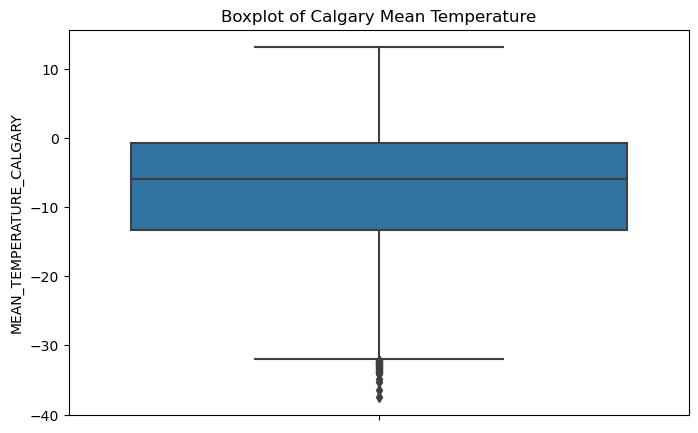

In [142]:
# Creating a boxplot for city to find outlier temperatures
mean_temp_columns = ['MEAN_TEMPERATURE_CALGARY']

# Correcting the data parameter to pass the DataFrame and using y parameter for the column
plt.figure(figsize=(8, 5))  # Setting the size of the figure
sns.boxplot(data=winter_df1, y='MEAN_TEMPERATURE_CALGARY')  # Corrected this line
plt.title('Boxplot of Calgary Mean Temperature')  # Adding a title to the plot
plt.show()  # Displaying the plot

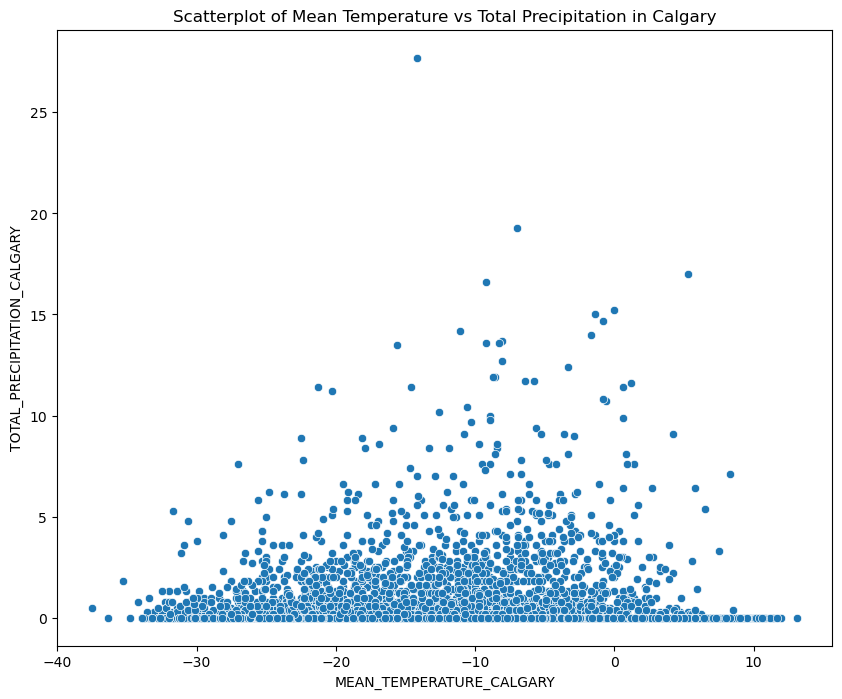

In [124]:
# Creating a scatter plot for Calgary to find outlier temperatures & precipitation
# Scatterplot temperatures & precipitation in Calgary
plt.figure(figsize=(10, 8))
sns.scatterplot(x=winter_df1['MEAN_TEMPERATURE_CALGARY'], y=winter_df['TOTAL_PRECIPITATION_CALGARY'])
plt.title('Scatterplot of Mean Temperature vs Total Precipitation in Calgary')
plt.show()

In [125]:
# Creating a list to hold outliers
outliers = winter_df1[winter_df1['TOTAL_PRECIPITATION_CALGARY'] > 25]['TOTAL_PRECIPITATION_CALGARY']
# Printing the outliers
outliers

1033    27.7
Name: TOTAL_PRECIPITATION_CALGARY, dtype: float64

In [126]:
# Remove outliers
winter_df1 = winter_df1.drop(1033)

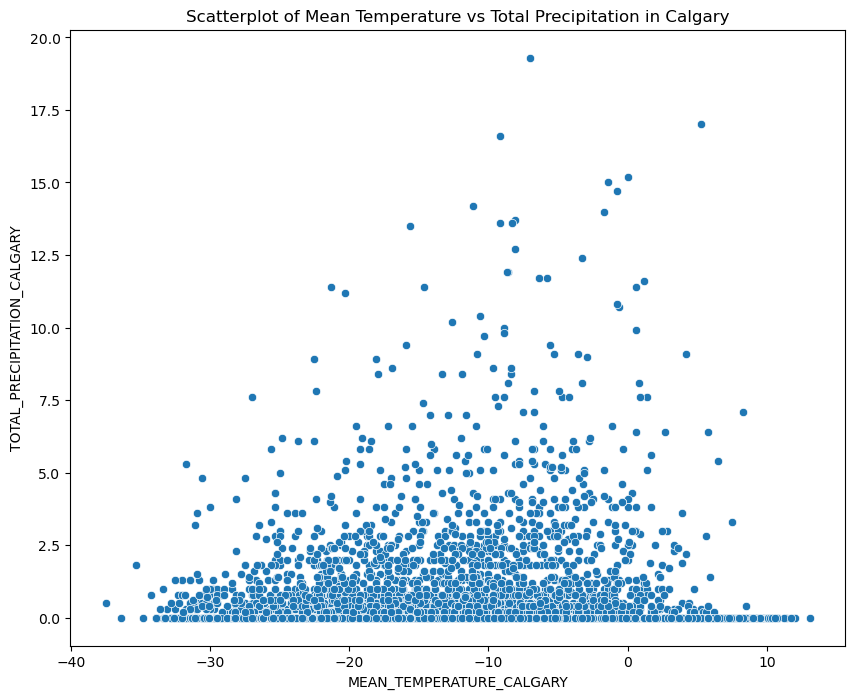

In [127]:
# Checking outlier temperatures & precipitation after removal
# Scatterplot temperatures & precipitation in Calgary
plt.figure(figsize=(10, 8))
sns.scatterplot(x=winter_df1['MEAN_TEMPERATURE_CALGARY'], y=winter_df['TOTAL_PRECIPITATION_CALGARY'])
plt.title('Scatterplot of Mean Temperature vs Total Precipitation in Calgary')
plt.show()

### Predict temperature next winter season in Calgary city

In [128]:
# Extract the year from the 'LOCAL_DATE' column
winter_df1['Year'] = winter_df1['LOCAL_DATE'].dt.year

# Group by 'Year' and calculate the mean for each group
yearly_mean_winter = winter_df1.groupby('Year').mean(numeric_only=True).reset_index()

# Print the new DataFrame
yearly_mean_winter

,Year,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY
0,1940,-8.649451,0.410989
1,1941,-6.771111,0.330000
2,1942,-6.838889,0.711111
3,1943,-6.593333,0.497778
4,1944,-5.364835,0.376923
...,...,...,...
75,2015,-4.474444,0.671591
76,2016,-4.822222,0.407778
77,2017,-7.081395,0.802222
78,2018,-6.750575,0.661111


In [129]:
# Creating a linear regression model that aims to predict the mean temperature in Calgary based on the total precipitation
calgary_winter = yearly_mean_winter[['Year', 'TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY']].dropna()

x = calgary_winter['TOTAL_PRECIPITATION_CALGARY']
y = calgary_winter['MEAN_TEMPERATURE_CALGARY']

# Add a constant to the features matrix for the y-intercept
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.192
Model:                                  OLS   Adj. R-squared:                  0.182
Method:                       Least Squares   F-statistic:                     18.56
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):           4.75e-05
Time:                              09:20:42   Log-Likelihood:                -182.45
No. Observations:                        80   AIC:                             368.9
Df Residuals:                            78   BIC:                             373.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

The R-squared value of the model outputs above is low that it still represents a poor fit to the data. Do transformations to make the dataset more suitable for linear regression.

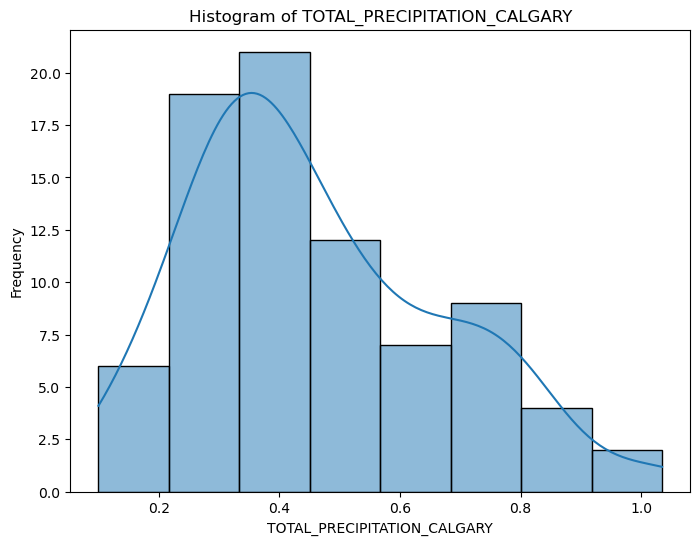

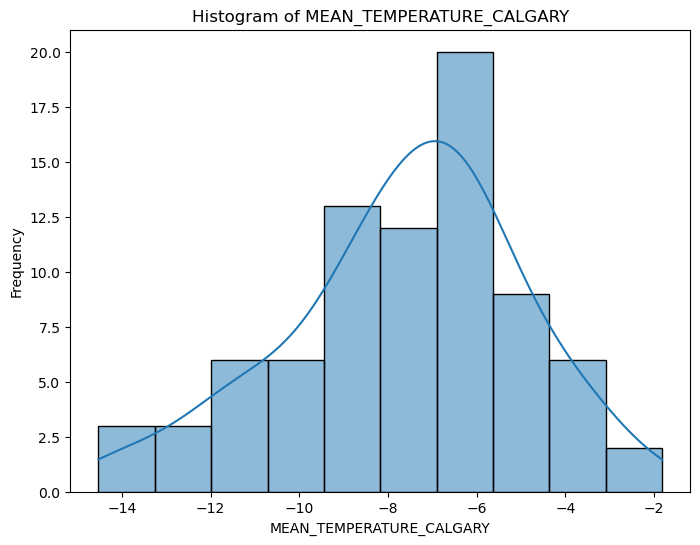

In [144]:
# Plots histograms to understanding the shape, center, and spread of data, as well as for identifying any potential outliers or skewness.
columns_to_plot = ['TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY']

# Plot histograms for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(calgary_winter[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [145]:
# Apply Log Transformations
calgary_winter['LOG_TOTAL_PRECIPITATION_CALGARY'] = np.log(calgary_winter['TOTAL_PRECIPITATION_CALGARY']+1)

x = calgary_winter['LOG_TOTAL_PRECIPITATION_CALGARY']
y = calgary_winter['MEAN_TEMPERATURE_CALGARY']


# Add a constant to the features matrix for the y-intercept
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.206
Model:                                  OLS   Adj. R-squared:                  0.196
Method:                       Least Squares   F-statistic:                     20.20
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):           2.39e-05
Time:                              09:21:18   Log-Likelihood:                -181.77
No. Observations:                        80   AIC:                             367.5
Df Residuals:                            78   BIC:                             372.3
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

Since No significant change in R-squared, we applied the Standard Scaling


In [147]:
# Apply StandardScaler 
# Initialize StandardScaler
scaler = StandardScaler()  # Ensure this line is not giving the error

# Apply scaling
calgary_winter['SCALED_LOG_TOTAL_PRECIPITATION'] = scaler.fit_transform(calgary_winter[['LOG_TOTAL_PRECIPITATION_CALGARY']])

# Prepare data for modeling
x = calgary_winter['SCALED_LOG_TOTAL_PRECIPITATION']
y = calgary_winter['MEAN_TEMPERATURE_CALGARY']
X = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.206
Model:                                  OLS   Adj. R-squared:                  0.196
Method:                       Least Squares   F-statistic:                     20.20
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):           2.39e-05
Time:                              09:21:25   Log-Likelihood:                -181.77
No. Observations:                        80   AIC:                             367.5
Df Residuals:                            78   BIC:                             372.3
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

Since No significant change in R-squared, we applied the Min-Max scaling


In [148]:
# Apply Min-Max scaling
# Dropping NA values from specific columns
calgary_winter = yearly_mean_winter.dropna(subset=['TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY'])

# Apply Min-Max scaling to the precipitation data
scaler = MinMaxScaler()
calgary_winter['MINMAX_TOTAL_PRECIPITATION'] = scaler.fit_transform(calgary_winter[['TOTAL_PRECIPITATION_CALGARY']])

# Selecting features and target variable
x = calgary_winter['MINMAX_TOTAL_PRECIPITATION']
y = calgary_winter['MEAN_TEMPERATURE_CALGARY']

# Adding a constant term to the features for the intercept
X = sm.add_constant(x)

# Fitting the OLS model
model = sm.OLS(y, X).fit()

# Printing the model summary to see coefficients, R-squared, etc.
print(model.summary())

# Predicting the target variable based on the features
y_pred = model.predict(X)

# Calculating RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculating MAE (Mean Absolute Error)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate the range of the mean temperature
temp_range = calgary_winter['MEAN_TEMPERATURE_CALGARY'].max() - calgary_winter['MEAN_TEMPERATURE_CALGARY'].min()
mean_temp_stats = calgary_winter['MEAN_TEMPERATURE_CALGARY'].describe()
print(mean_temp_stats)

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.192
Model:                                  OLS   Adj. R-squared:                  0.182
Method:                       Least Squares   F-statistic:                     18.56
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):           4.75e-05
Time:                              09:21:29   Log-Likelihood:                -182.45
No. Observations:                        80   AIC:                             368.9
Df Residuals:                            78   BIC:                             373.7
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

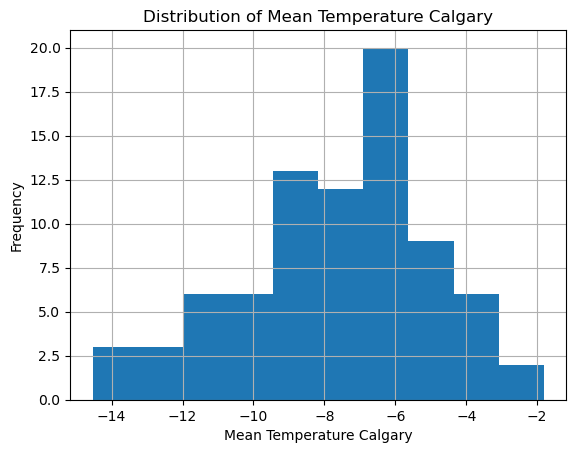

In [149]:
# Histogram
calgary_winter['MEAN_TEMPERATURE_CALGARY'].hist()
plt.xlabel('Mean Temperature Calgary')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Temperature Calgary')
plt.show()

The RMSE (Root Mean Square Error) and MAE (Mean Absolute Error) values are 2.367098675115937 and 1.8718569294482896, respectively. Given that the distribution of the Mean Temperature is 2.650338, these error metrics are considered low and acceptable, indicating a reliable model performance."

In [150]:
# Predict Precipitation next winter season
data = calgary_winter[['Year', 'TOTAL_PRECIPITATION_CALGARY']]
from sklearn.linear_model import LinearRegression

X = data[['Year']]  # Features (year)
y = data['TOTAL_PRECIPITATION_CALGARY']  # Target variable (temperature)

model = LinearRegression()
model.fit(X, y)

future_years = pd.DataFrame({'Year': range(2020,2021)})
future_temps = model.predict(future_years)

print("Predicted Precipitation for 2020-2021:")
print(future_temps)

Predicted Precipitation for 2020-2021:
[0.34883092]


RMSE: 2.0654679490780903
MAE: 1.4780943556144568
R^2: 0.0030332367313031794


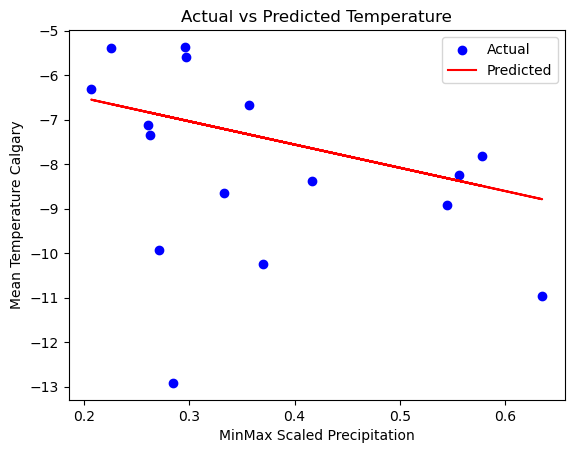

Predicted Future Mean Temperature Calgary: [-7.25352714]


In [151]:
# Apply Min-Max scaling to the future prediction data 
calgary_winter = calgary_winter.dropna(subset=['TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY'])

X = calgary_winter[['TOTAL_PRECIPITATION_CALGARY']]
y = calgary_winter['MEAN_TEMPERATURE_CALGARY']

# Apply MinMax scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

# Plotting
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.xlabel('MinMax Scaled Precipitation')
plt.ylabel('Mean Temperature Calgary')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()

# Sample future data (already MinMax scaled)
future_precipitation = np.array([[0.34151853]]).reshape(-1, 1)

# Predict future temperatures
future_temperatures = model.predict(future_precipitation)

# Print the predictions
print("Predicted Future Mean Temperature Calgary:", future_temperatures)

The low R-squared value of 0.0030332367313031794 suggests that the model hardly explains any of the variability in the target variable, signaling a potential inadequacy in the model’s explanatory power. We need to consider more variables such as humidity, pressure, wind speed, and other climatic factors that could have significant influences on temperature. So, we're going to try using more detailed methods to understand the weather patterns better. Next, we try to do complex modeling techniques to better capture the underlying patterns in the weather data.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=388.231, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=382.543, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=375.449, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=386.231, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=373.454, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=367.311, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=380.543, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=369.303, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=369.303, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=368.874, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=378.842, Time=0.03 se

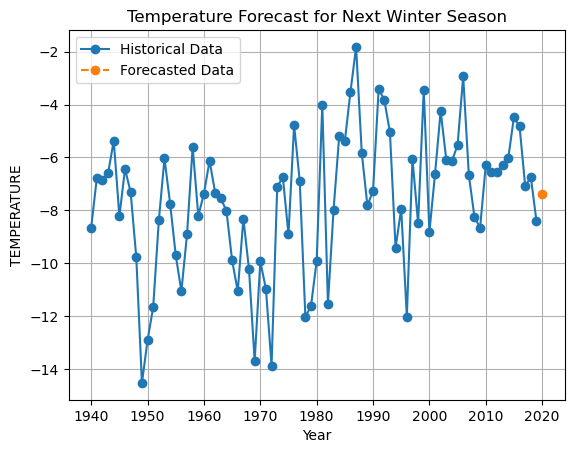

In [387]:
# Fit ARIMA model
model = pm.auto_arima(calgary_winter['MEAN_TEMPERATURE_CALGARY'], seasonal=False, trace=True,
                      suppress_warnings=True, m=1, stepwise=True)
model.fit(calgary_winter['MEAN_TEMPERATURE_CALGARY'])

# Forecast precipitation for next winter season
future_forecast = model.predict(n_periods=1)

# Print forecast
print("Forecasted Temperature for next winter season:")
print(future_forecast)

# Plot original data with markers
plt.plot(calgary_winter['Year'], calgary_winter['MEAN_TEMPERATURE_CALGARY'], label='Historical Data', marker='o')

# Plot forecasted data with markers and dashed lines
plt.plot(np.arange(2020,2021), future_forecast, label='Forecasted Data', linestyle='--', marker='o')

plt.xlabel('Year')
plt.ylabel('TEMPERATURE')
plt.title('Temperature Forecast for Next Winter Season')
plt.legend()
plt.grid(True)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-29.298, Time=0.79 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=6.645, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-25.771, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-34.836, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4.651, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-36.777, Time=0.12 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-34.853, Time=0.26 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-33.075, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-37.077, Time=0.14 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-35.078, Time=0.25 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-35.078, Time=0.29 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-33.127, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-27.054, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-35.313, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   

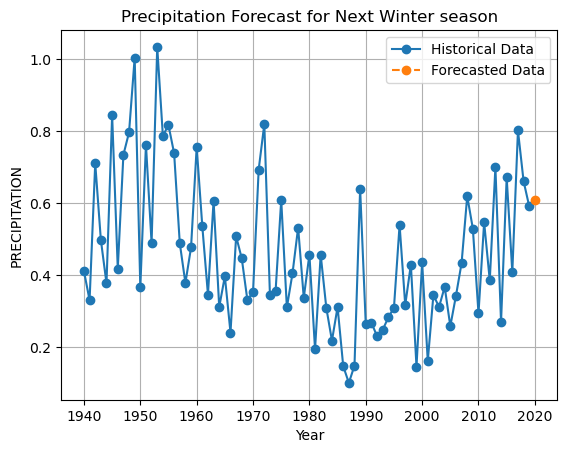

In [388]:
# Predict next winter season for PRECIPITATION 
# Fit a seasonal ARIMA model instead (SARIMA)
model = pm.auto_arima(calgary_winter['TOTAL_PRECIPITATION_CALGARY'], seasonal=True, m=12, trace=True,
                      suppress_warnings=True, stepwise=True)
model.fit(calgary_winter['TOTAL_PRECIPITATION_CALGARY'])

# Forecast precipitation for next fall season
future_forecast1 = model.predict(n_periods=1)

# Print forecast
print("Forecasted Precipitation for next fall season:")
print(future_forecast1)

# Plot original data with markers
plt.plot(calgary_winter['Year'], calgary_winter['TOTAL_PRECIPITATION_CALGARY'], label='Historical Data', marker='o')

# Plot forecasted data with markers and dashed lines
plt.plot(np.arange(2020,2021), future_forecast1, label='Forecasted Data', linestyle='--', marker='o')

plt.xlabel('Year')
plt.ylabel('PRECIPITATION')
plt.title('Precipitation Forecast for Next Winter season')
plt.legend()
plt.grid(True)
plt.show()

In [389]:
# Creating a new DataFrame for the predicted data
future_data = pd.DataFrame({'Year': [2020], 'MEAN_TEMPERATURE_CALGARY': future_forecast, 'TOTAL_PRECIPITATION_CALGARY': future_forecast1})

# Concatenating the old and predicted data
winter = pd.concat([calgary_winter, future_data], ignore_index=True)
winter

,Year,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MINMAX_TOTAL_PRECIPITATION
0,1940,-8.649451,0.410989,0.332806
1,1941,-6.771111,0.330000,0.246136
2,1942,-6.838889,0.711111,0.653983
3,1943,-6.593333,0.497778,0.425684
4,1944,-5.364835,0.376923,0.296350
...,...,...,...,...
76,2016,-4.822222,0.407778,0.329370
77,2017,-7.081395,0.802222,0.751486
78,2018,-6.750575,0.661111,0.600476
79,2019,-8.406667,0.591111,0.525565


In [390]:
# Drop column MINMAX_TOTAL_PRECIPITATION
winter = winter.drop(columns='MINMAX_TOTAL_PRECIPITATION')
# Rename columns
winter = winter.rename(columns={ 'MEAN_TEMPERATURE_CALGARY': 'Winter Mean Temperature', 'TOTAL_PRECIPITATION_CALGARY': 'Winter Precipitation'})
winter

,Year,Winter Mean Temperature,Winter Precipitation
0,1940,-8.649451,0.410989
1,1941,-6.771111,0.330000
2,1942,-6.838889,0.711111
3,1943,-6.593333,0.497778
4,1944,-5.364835,0.376923
...,...,...,...
76,2016,-4.822222,0.407778
77,2017,-7.081395,0.802222
78,2018,-6.750575,0.661111
79,2019,-8.406667,0.591111


In [391]:
# Save the new DataFrame to a CSV file
# Specify the file path where the CSV file will be saved
file_path = r'C:\Users\CFS\Desktop\Data analysis\Midterm-Project\winter_temperature_forecast.csv'
winter.to_csv(file_path, index=False)

### Predict temperature next spring season in Calgary city

In [207]:
spring_df

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,1940-03-01,1.1,0.0,NaN,NaN,NaN,NaN,-9.5,0.0,NaN,...,NaN,NaN,-8.1,0.0,8.9,13.5,NaN,NaN,-12.5,0.0
1,1940-03-02,2.5,0.3,NaN,NaN,NaN,NaN,-15.9,0.0,NaN,...,NaN,NaN,-7.8,0.0,6.7,0.0,NaN,NaN,-5.9,0.0
2,1940-03-03,-2.8,0.0,NaN,NaN,NaN,NaN,-14.2,0.0,NaN,...,NaN,NaN,-4.4,8.6,8.1,7.4,NaN,NaN,-6.1,0.0
3,1940-03-04,5.0,0.5,NaN,NaN,NaN,NaN,-8.6,0.0,NaN,...,NaN,NaN,0.3,6.1,8.4,15.0,NaN,NaN,-7.2,0.0
4,1940-03-05,2.3,0.3,NaN,NaN,NaN,NaN,-0.3,9.9,NaN,...,NaN,NaN,-0.3,0.0,7.0,0.0,NaN,NaN,-2.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7355,2019-05-27,11.5,0.0,13.2,0.0,8.8,0.4,9.5,NaN,13.1,...,2.3,0.2,16.7,0.6,17.9,0.0,18.2,NaN,12.0,0.0
7356,2019-05-28,14.1,0.0,15.1,0.0,9.4,0.0,8.7,NaN,10.3,...,4.6,0.2,11.3,4.6,16.0,0.0,16.0,NaN,18.0,0.0
7357,2019-05-29,16.3,0.0,18.2,0.0,8.6,1.4,8.8,NaN,12.2,...,8.3,0.0,13.1,0.6,15.3,0.0,12.9,NaN,17.9,0.0
7358,2019-05-30,17.9,0.0,12.9,0.0,9.7,0.0,9.9,NaN,16.6,...,7.4,0.0,16.3,0.0,15.6,0.0,15.2,NaN,21.1,0.0


In [208]:
spring_df.describe()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
count,7301.000000,7301.000000,5428.000000,5427.000000,5501.00000,5496.000000,6808.000000,6714.000000,7139.000000,7153.000000,...,7163.000000,7159.000000,7345.000000,7345.000000,7352.000000,7351.000000,6886.000000,6314.000000,7328.000000,7319.000000
mean,3.610588,1.103068,2.837417,0.961434,4.09880,3.772125,3.416539,3.143268,5.701149,2.456773,...,1.670822,3.752368,6.285051,2.179823,9.393226,2.624799,0.278449,0.387203,2.917706,1.316423
std,7.899226,3.324449,8.764273,3.102763,6.08961,8.379394,6.807093,6.908979,8.090208,5.356611,...,5.135553,7.577280,7.430495,5.224980,3.467901,5.103616,8.067438,1.235258,9.936106,4.098863
min,-33.400000,0.000000,-33.800000,0.000000,-17.20000,0.000000,-20.800000,0.000000,-24.200000,0.000000,...,-18.400000,0.000000,-18.800000,0.000000,-5.800000,0.000000,-31.700000,0.000000,-28.900000,0.000000
25%,-0.300000,0.000000,-1.800000,0.000000,0.10000,0.000000,-0.900000,0.000000,0.300000,0.000000,...,-1.400000,0.000000,1.400000,0.000000,7.000000,0.000000,-3.600000,0.000000,-3.162500,0.000000
50%,4.600000,0.000000,4.100000,0.000000,4.20000,0.000000,3.500000,0.000000,6.000000,0.000000,...,1.500000,0.500000,6.500000,0.000000,9.200000,0.000000,1.700000,0.000000,3.700000,0.000000
75%,8.900000,0.500000,9.000000,0.300000,8.50000,3.300000,8.100000,2.800000,11.700000,2.200000,...,4.800000,4.100000,11.500000,1.500000,11.800000,3.000000,5.800000,0.000000,10.000000,0.475000
max,22.500000,51.800000,23.100000,44.600000,23.90000,91.500000,22.400000,131.800000,26.800000,46.500000,...,18.900000,91.700000,27.600000,92.700000,22.400000,49.300000,23.700000,15.800000,28.900000,68.800000


In [209]:
# Creating a dataframe spring_fall_df copy before cleaning
spring_df1 = spring_df[['LOCAL_DATE', 'MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY']].copy()

### Exploratory data analysis (EDA) to find outliers

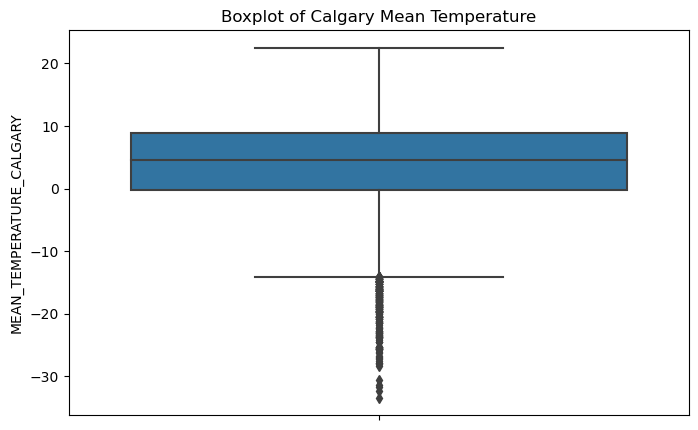

In [210]:
# Creating a boxplot for city to find outlier temperatures
mean_temp_columns = ['MEAN_TEMPERATURE_CALGARY']

# Correcting the data parameter to pass the DataFrame and using y parameter for the column
plt.figure(figsize=(8, 5))  # Setting the size of the figure
sns.boxplot(data=spring_df1, y='MEAN_TEMPERATURE_CALGARY')  # Corrected this line
plt.title('Boxplot of Calgary Mean Temperature')  # Adding a title to the plot
plt.show()  # Displaying the plot

In [211]:
# Create a list to keep outliers with temperatures < -12 
# Because our spring products are only used when temperatures are > -12 degrees

outliers = spring_df1[spring_df1['MEAN_TEMPERATURE_CALGARY'] < -10].index
outliers
# Printing the outliers
outliers

Int64Index([   9,   10,   21,   22,   23,   92,   93,  102,  107,  206,
            ...
            7207, 7212, 7213, 7268, 7269, 7270, 7271, 7272, 7273, 7274],
           dtype='int64', length=467)

In [212]:
# Remove outliers
spring_df1 = spring_df1.drop(outliers)

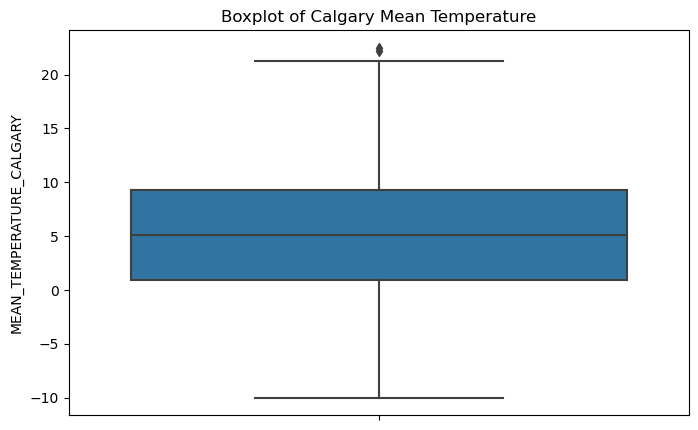

In [213]:
# Check ouliers
# Correcting the data parameter to pass the DataFrame and using y parameter for the column
plt.figure(figsize=(8, 5))  # Setting the size of the figure
sns.boxplot(data=spring_df1, y='MEAN_TEMPERATURE_CALGARY')  # Corrected this line
plt.title('Boxplot of Calgary Mean Temperature')  # Adding a title to the plot
plt.show()  # Displaying the plot

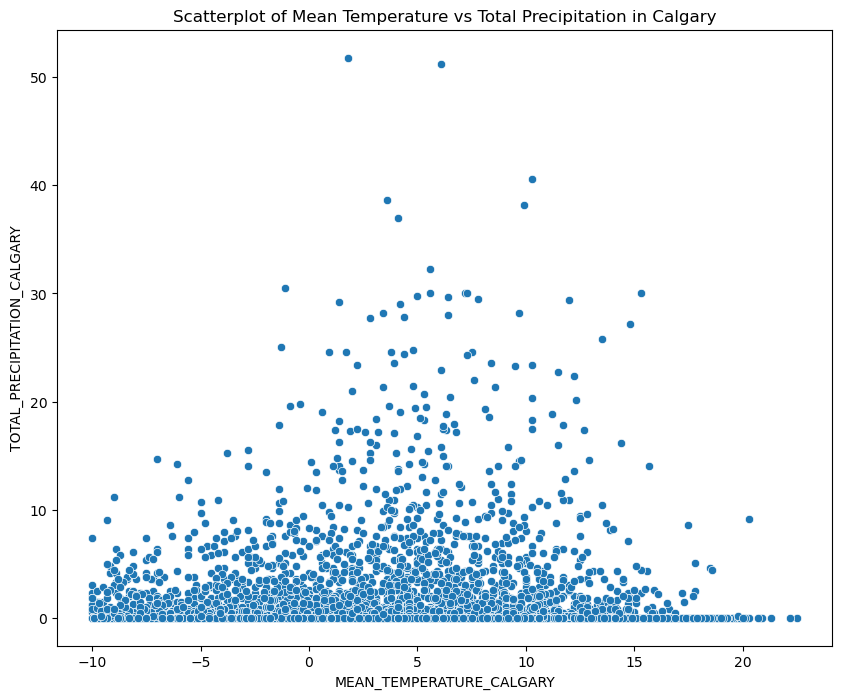

In [214]:
# Creating a scatter plot for Calgary to find outlier temperatures & precipitation
# Scatterplot temperatures & precipitation in Calgary
plt.figure(figsize=(10, 8))
sns.scatterplot(x=spring_df1['MEAN_TEMPERATURE_CALGARY'], y=spring_df1['TOTAL_PRECIPITATION_CALGARY'])
plt.title('Scatterplot of Mean Temperature vs Total Precipitation in Calgary')
plt.show()

In [215]:
# Creating a list to hold outliers
outliers = spring_df1[spring_df1['TOTAL_PRECIPITATION_CALGARY'] > 45]['TOTAL_PRECIPITATION_CALGARY']
# Printing the outliers
outliers

3838    51.8
6800    51.2
Name: TOTAL_PRECIPITATION_CALGARY, dtype: float64

In [216]:
# Remove outliers
spring_df1 = spring_df1.drop([3838,6800,])

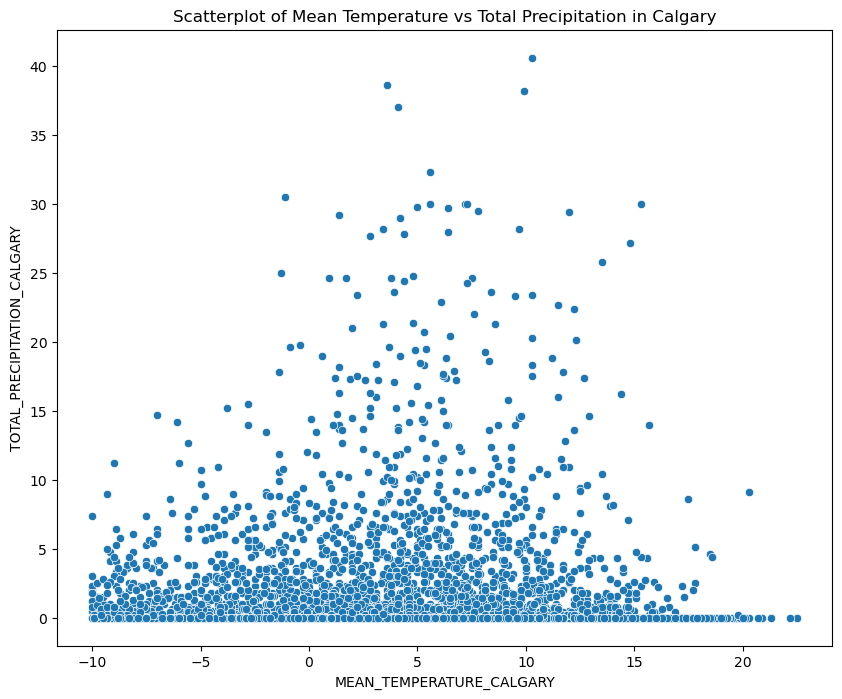

In [217]:
# Check ouliers
# Scatterplot temperatures & precipitation in Calgary
plt.figure(figsize=(10, 8))
sns.scatterplot(x=spring_df1['MEAN_TEMPERATURE_CALGARY'], y=spring_df1['TOTAL_PRECIPITATION_CALGARY'])
plt.title('Scatterplot of Mean Temperature vs Total Precipitation in Calgary')
plt.show()

In [218]:
# Extract the year from the 'LOCAL_DATE' column
spring_df1['Year'] = spring_df1['LOCAL_DATE'].dt.year

# Group by 'Year' and calculate the mean for each group
yearly_mean_spring = spring_df1.groupby('Year').mean(numeric_only=True).reset_index()

# Print the new DataFrame
yearly_mean_spring

,Year,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY
0,1940,4.308046,1.549425
1,1941,5.493182,1.195455
2,1942,4.331868,0.918681
3,1943,4.841463,1.131707
4,1944,6.666667,1.376543
...,...,...,...
75,2015,6.614286,0.583146
76,2016,7.529348,0.835870
77,2017,6.867073,1.292857
78,2018,5.618987,1.067901


In [219]:
# Creating a linear regression model that aims to predict the mean temperature in Calgary based on the total precipitation
calgary_spring = yearly_mean_spring[['Year', 'TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY']].dropna()

x = calgary_spring['TOTAL_PRECIPITATION_CALGARY']
y = calgary_spring['MEAN_TEMPERATURE_CALGARY']

# Add a constant to the features matrix for the y-intercept
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.124
Model:                                  OLS   Adj. R-squared:                  0.113
Method:                       Least Squares   F-statistic:                     11.04
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):            0.00136
Time:                              09:29:06   Log-Likelihood:                -119.01
No. Observations:                        80   AIC:                             242.0
Df Residuals:                            78   BIC:                             246.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

The R-squared value of the model outputs above is low that it still represents a poor fit to the data. Do transformations to make the dataset more suitable for linear regression.

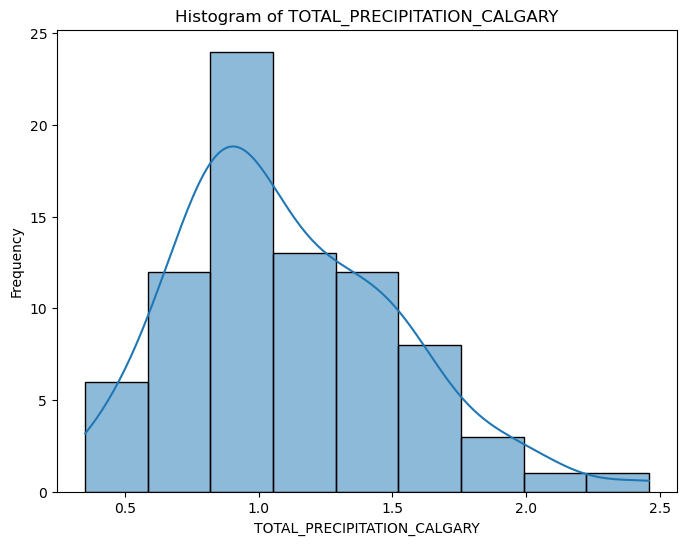

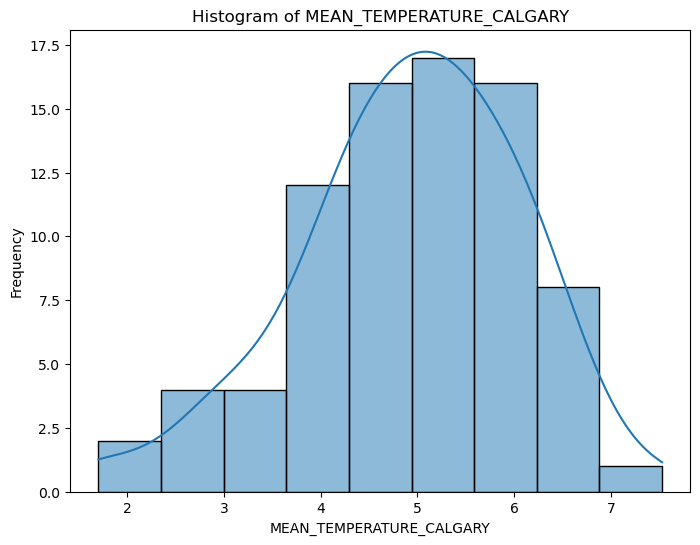

In [220]:
# Plots histograms to understanding the shape, center, and spread of data, as well as for identifying any potential outliers or skewness.
columns_to_plot = ['TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY']

# Plot histograms for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(calgary_spring[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [221]:
# Apply Log Transformations
calgary_spring['LOG_TOTAL_PRECIPITATION_CALGARY'] = np.log(calgary_spring['TOTAL_PRECIPITATION_CALGARY']+1)

x = calgary_spring['LOG_TOTAL_PRECIPITATION_CALGARY']
y = calgary_spring['MEAN_TEMPERATURE_CALGARY']


# Add a constant to the features matrix for the y-intercept
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.126
Model:                                  OLS   Adj. R-squared:                  0.115
Method:                       Least Squares   F-statistic:                     11.25
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):            0.00123
Time:                              09:29:13   Log-Likelihood:                -118.92
No. Observations:                        80   AIC:                             241.8
Df Residuals:                            78   BIC:                             246.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

Since No significant change in R-squared, we applied the Standard Scaling


In [222]:
# Apply StandardScaler 
# Initialize StandardScaler
scaler = StandardScaler()  # Ensure this line is not giving the error

# Apply scaling
calgary_spring['SCALED_LOG_TOTAL_PRECIPITATION'] = scaler.fit_transform(calgary_spring[['LOG_TOTAL_PRECIPITATION_CALGARY']])

# Prepare data for modeling
x = calgary_spring['SCALED_LOG_TOTAL_PRECIPITATION']
y = calgary_spring['MEAN_TEMPERATURE_CALGARY']
X = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.126
Model:                                  OLS   Adj. R-squared:                  0.115
Method:                       Least Squares   F-statistic:                     11.25
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):            0.00123
Time:                              09:29:17   Log-Likelihood:                -118.92
No. Observations:                        80   AIC:                             241.8
Df Residuals:                            78   BIC:                             246.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

Since No significant change in R-squared, we applied the Min-Max scaling


In [223]:
# Apply Min-Max scaling
# Dropping NA values from specific columns
calgary_spring = yearly_mean_spring.dropna(subset=['TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY'])

# Apply Min-Max scaling to the precipitation data
scaler = MinMaxScaler()
calgary_spring['MINMAX_TOTAL_PRECIPITATION'] = scaler.fit_transform(calgary_spring[['TOTAL_PRECIPITATION_CALGARY']])

# Selecting features and target variable
x = calgary_spring['MINMAX_TOTAL_PRECIPITATION']
y = calgary_spring['MEAN_TEMPERATURE_CALGARY']

# Adding a constant term to the features for the intercept
X = sm.add_constant(x)

# Fitting the OLS model
model = sm.OLS(y, X).fit()

# Printing the model summary to see coefficients, R-squared, etc.
print(model.summary())

# Predicting the target variable based on the features
y_pred = model.predict(X)

# Calculating RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculating MAE (Mean Absolute Error)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate the range of the mean temperature
temp_range = calgary_spring['MEAN_TEMPERATURE_CALGARY'].max() - calgary_spring['MEAN_TEMPERATURE_CALGARY'].min()
mean_temp_stats = calgary_spring['MEAN_TEMPERATURE_CALGARY'].describe()
print(mean_temp_stats)

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.124
Model:                                  OLS   Adj. R-squared:                  0.113
Method:                       Least Squares   F-statistic:                     11.04
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):            0.00136
Time:                              09:29:19   Log-Likelihood:                -119.01
No. Observations:                        80   AIC:                             242.0
Df Residuals:                            78   BIC:                             246.8
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

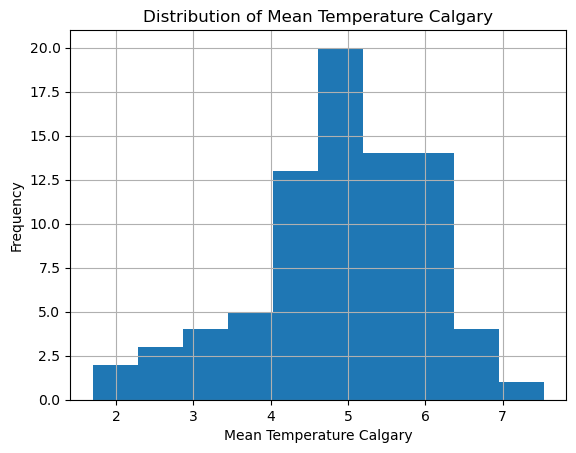

In [224]:
# Histogram
calgary_spring['MEAN_TEMPERATURE_CALGARY'].hist()
plt.xlabel('Mean Temperature Calgary')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Temperature Calgary')
plt.show()

The RMSE (Root Mean Square Error) and MAE (Mean Absolute Error) values are 1.0710660371211609 and 0.8610506687677745, respectively. Given that the distribution of the Mean Temperature is 1.151603, these error metrics are considered low and acceptable, indicating a reliable model performance."

In [225]:
# Predict Precipitation next spring season
data = calgary_spring[['Year', 'TOTAL_PRECIPITATION_CALGARY']]
from sklearn.linear_model import LinearRegression

X = data[['Year']]  # Features (year)
y = data['TOTAL_PRECIPITATION_CALGARY']  # Target variable (temperature)

model = LinearRegression()
model.fit(X, y)

future_years = pd.DataFrame({'Year': range(2020, 2021)})
future_temps = model.predict(future_years)

print("Predicted Precipitation for 2020:")
print(future_temps)

Predicted Precipitation for 2020:
[1.08675526]


RMSE: 1.039441526540374
MAE: 0.8365304953914633
R^2: -0.20312673951388005


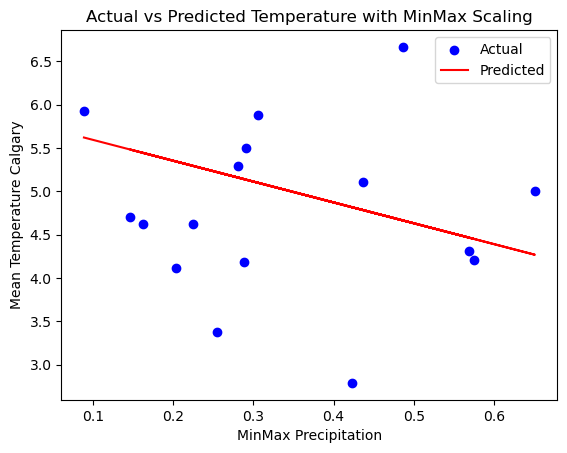

Predicted Future Mean Temperature Calgary: [3.22020263]


In [226]:
# Apply Min-Max scaling to the future prediction data 
calgary_spring = calgary_spring.dropna(subset=['TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY'])

X = calgary_spring[['TOTAL_PRECIPITATION_CALGARY']]
y = calgary_spring['MEAN_TEMPERATURE_CALGARY']

# Apply MinMax Scaling to X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

# Plotting
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.xlabel('MinMax Precipitation')
plt.ylabel('Mean Temperature Calgary')
plt.title('Actual vs Predicted Temperature with MinMax Scaling')
plt.legend()
plt.show()

# Sample future data (MinMax scaled)
future_precipitation = np.array([[1.08614232]]).reshape(-1, 1)  # Example scaled data

# Predict future temperatures
future_temperatures = model.predict(future_precipitation)

# Print the predictions
print("Predicted Future Mean Temperature Calgary:", future_temperatures)

Since R-squared (-0.4782560014185393) is negative, it means the model is performing worse than a model that would predict the mean of the dependent variable for every observation. We need to consider more variables such as humidity, pressure, wind speed, and other climatic factors that could have significant influences on temperature. So, we're going to try using more detailed methods to understand the weather patterns better. Next, we try to do complex modeling techniques to better capture the underlying patterns in the weather data.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=290.320, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=276.381, Time=0.05 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=288.331, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=275.637, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=276.307, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=263.382, Time=0.04 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=263.430, Time=0.08 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=263.338, Time=0.08 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=265.168, Time=0.27 sec
 ARIMA(2,1,0)(0,0,2)[12] intercept   : AIC=265.295, Time=0.18 sec
 ARIMA(2,1,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.99 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=264.53

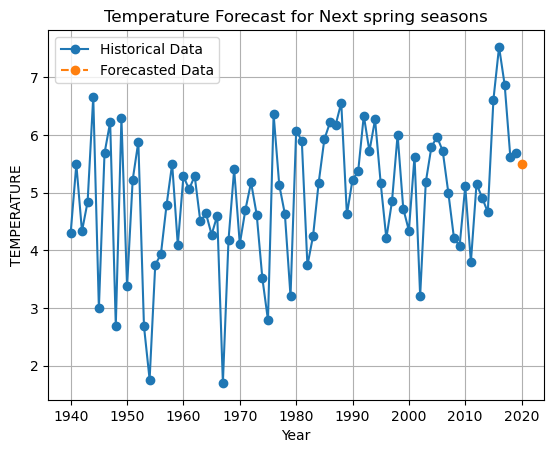

In [382]:
# Fit a seasonal ARIMA model instead (SARIMA)
model = pm.auto_arima(calgary_spring['MEAN_TEMPERATURE_CALGARY'], seasonal=True, m=12, trace=True,
                      suppress_warnings=True, stepwise=True)
model.fit(calgary_spring['MEAN_TEMPERATURE_CALGARY'])

# Forecast precipitation for next spring season
future_forecast = model.predict(n_periods=1)

# Print forecast
print("Forecasted Temperature for next spring season:")
print(future_forecast)

# Plot original data with markers
plt.plot(calgary_spring['Year'], calgary_spring['MEAN_TEMPERATURE_CALGARY'], label='Historical Data', marker='o')

# Plot forecasted data with markers and dashed lines
plt.plot(np.arange(2020,2021), future_forecast, label='Forecasted Data', linestyle='--', marker='o')

plt.xlabel('Year')
plt.ylabel('TEMPERATURE')
plt.title('Temperature Forecast for Next spring seasons')
plt.legend()
plt.grid(True)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=93.562, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=87.808, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=89.595, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=88.361, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=256.092, Time=0.02 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=89.711, Time=0.17 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=89.695, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=91.555, Time=0.47 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=87.656, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=89.587, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=91.554, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=87.064, Time=0.10 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=89.037, Time=0.25 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=89.034, Time=0.12 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=91.

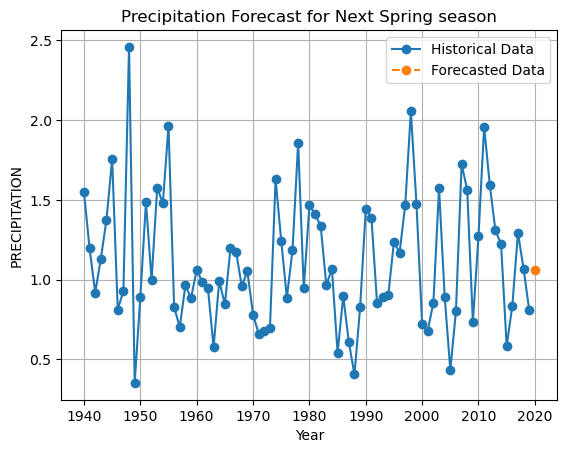

In [383]:
# Predict next spring season for PRECIPITATION 
# Fit a seasonal ARIMA model instead (SARIMA)
model = pm.auto_arima(calgary_spring['TOTAL_PRECIPITATION_CALGARY'], seasonal=True, m=12, trace=True,
                      suppress_warnings=True, stepwise=True)
model.fit(calgary_spring['TOTAL_PRECIPITATION_CALGARY'])

# Forecast precipitation for next fall season
future_forecast1 = model.predict(n_periods=1)

# Print forecast
print("Forecasted Precipitation for next fall season:")
print(future_forecast1)

# Plot original data with markers
plt.plot(calgary_spring['Year'], calgary_spring['TOTAL_PRECIPITATION_CALGARY'], label='Historical Data', marker='o')

# Plot forecasted data with markers and dashed lines
plt.plot(np.arange(2020,2021), future_forecast1, label='Forecasted Data', linestyle='--', marker='o')

plt.xlabel('Year')
plt.ylabel('PRECIPITATION')
plt.title('Precipitation Forecast for Next Spring season')
plt.legend()
plt.grid(True)
plt.show()

In [384]:
# Creating a new DataFrame for the predicted data
future_data = pd.DataFrame({'Year': [2020],'MEAN_TEMPERATURE_CALGARY': future_forecast, 'TOTAL_PRECIPITATION_CALGARY': future_forecast1})

# Concatenating the old and predicted data
spring = pd.concat([calgary_spring, future_data], ignore_index=True)
spring

,Year,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MINMAX_TOTAL_PRECIPITATION
0,1940,4.308046,1.549425,0.568259
1,1941,5.493182,1.195455,0.400238
2,1942,4.331868,0.918681,0.268860
3,1943,4.841463,1.131707,0.369979
4,1944,6.666667,1.376543,0.486196
...,...,...,...,...
76,2016,7.529348,0.835870,0.229552
77,2017,6.867073,1.292857,0.446473
78,2018,5.618987,1.067901,0.339691
79,2019,5.690476,0.808333,0.216481


In [385]:
# Drop column MINMAX_TOTAL_PRECIPITATION
spring = spring.drop(columns='MINMAX_TOTAL_PRECIPITATION')
# Rename columns
spring = spring.rename(columns={ 'MEAN_TEMPERATURE_CALGARY': 'Spring Mean Temperature', 'TOTAL_PRECIPITATION_CALGARY': 'Spring Precipitation'})
spring

,Year,Spring Mean Temperature,Spring Precipitation
0,1940,4.308046,1.549425
1,1941,5.493182,1.195455
2,1942,4.331868,0.918681
3,1943,4.841463,1.131707
4,1944,6.666667,1.376543
...,...,...,...
76,2016,7.529348,0.835870
77,2017,6.867073,1.292857
78,2018,5.618987,1.067901
79,2019,5.690476,0.808333


In [386]:
# Save the new DataFrame to a CSV file
# Specify the file path where the CSV file will be saved
file_path = r'C:\Users\CFS\Desktop\Data analysis\Midterm-Project\spring_temperature_forecast.csv'
spring.to_csv(file_path, index=False)

### Predict temperature next fall season in Calgary city

In [290]:
fall_df

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,1940-09-01,18.4,0.0,NaN,NaN,NaN,NaN,19.5,0.0,NaN,...,NaN,NaN,18.1,0.3,18.3,0.0,NaN,NaN,19.8,0.0
1,1940-09-02,16.1,0.0,NaN,NaN,NaN,NaN,19.7,2.3,NaN,...,NaN,NaN,17.0,10.2,15.6,0.0,NaN,NaN,22.0,0.0
2,1940-09-03,16.9,0.0,NaN,NaN,NaN,NaN,19.2,0.0,NaN,...,NaN,NaN,18.6,0.0,14.7,0.0,NaN,NaN,21.1,0.0
3,1940-09-04,15.6,17.5,NaN,NaN,NaN,NaN,18.3,0.8,NaN,...,NaN,NaN,18.9,0.0,16.1,0.0,NaN,NaN,26.4,9.7
4,1940-09-05,12.0,29.2,NaN,NaN,NaN,NaN,13.4,2.3,NaN,...,NaN,NaN,16.4,0.0,15.0,0.0,NaN,NaN,26.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7275,2019-11-26,-5.7,1.5,-8.6,0.4,5.0,0.0,3.1,NaN,4.1,...,3.4,0.4,6.4,0.0,3.8,4.8,-12.6,NaN,-3.1,0.0
7276,2019-11-27,-11.0,2.6,-12.6,0.4,4.6,0.0,3.0,NaN,0.2,...,3.4,0.7,7.1,6.4,4.2,0.0,-13.0,NaN,-5.0,0.0
7277,2019-11-28,-16.3,1.2,-12.6,0.2,1.4,40.2,1.8,NaN,NaN,...,2.2,0.5,1.5,0.0,0.8,0.0,-8.8,NaN,-6.6,0.0
7278,2019-11-29,-16.1,0.0,-13.8,0.0,-1.6,1.0,-2.4,NaN,-4.5,...,2.5,27.9,-2.1,0.0,-0.4,0.0,-5.1,NaN,-4.2,0.1


In [181]:
fall_df.describe()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
count,7244.000000,7246.000000,5355.000000,5356.000000,5525.000000,5487.000000,6673.000000,6551.000000,7153.000000,7153.000000,...,7064.000000,7063.000000,7246.000000,7246.000000,7270.000000,7272.000000,6919.000000,6291.000000,7259.000000,7191.000000
mean,4.620458,0.811234,2.875014,0.874944,8.960380,4.302716,7.654788,3.294566,8.789976,2.818237,...,7.534088,4.624996,9.723434,2.193486,10.312669,3.791625,-0.299393,0.816134,4.918722,1.258879
std,8.124395,2.929333,8.556700,2.850557,5.985285,10.288360,6.425385,7.814800,7.112731,6.700079,...,5.141447,9.498344,6.811857,5.853566,4.381770,7.395328,9.036452,1.954055,9.093523,3.956330
min,-31.400000,0.000000,-31.500000,0.000000,-10.200000,0.000000,-13.300000,0.000000,-15.000000,0.000000,...,-8.200000,0.000000,-11.700000,0.000000,-11.500000,0.000000,-37.300000,0.000000,-29.700000,0.000000
25%,0.000000,0.000000,-2.000000,0.000000,4.700000,0.000000,3.000000,0.000000,3.600000,0.000000,...,3.700000,0.000000,4.800000,0.000000,7.300000,0.000000,-5.300000,0.000000,-0.900000,0.000000
50%,5.500000,0.000000,3.900000,0.000000,9.300000,0.000000,7.800000,0.000000,8.900000,0.000000,...,7.500000,0.500000,9.700000,0.000000,10.500000,0.000000,1.600000,0.000000,5.700000,0.000000
75%,10.500000,0.200000,9.100000,0.300000,13.400000,2.700000,12.300000,2.500000,14.100000,2.300000,...,11.300000,4.700000,14.700000,1.300000,13.600000,4.600000,6.200000,0.600000,11.700000,0.500000
max,22.600000,92.600000,23.100000,60.500000,26.700000,106.400000,27.200000,120.600000,27.550000,93.500000,...,22.600000,100.800000,30.000000,121.400000,22.200000,91.600000,19.200000,25.200000,29.500000,74.400000


In [337]:
# Creating a dataframe fall_df copy before cleaning
fall_df1 = fall_df[['LOCAL_DATE', 'MEAN_TEMPERATURE_CALGARY', 'TOTAL_PRECIPITATION_CALGARY']].copy()

### Exploratory data analysis (EDA) to find outliers

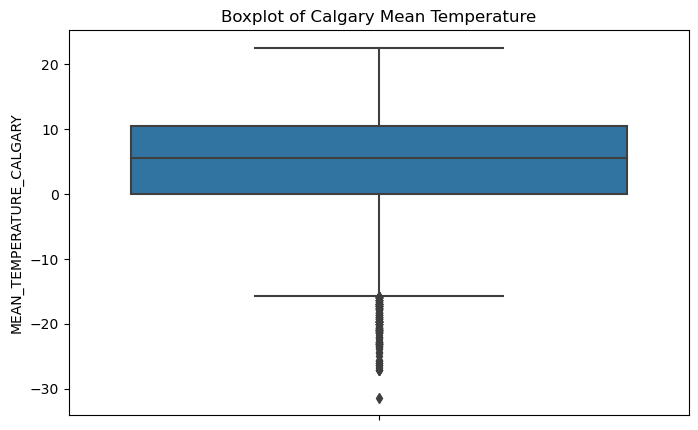

In [339]:
# Creating a boxplot for city to find outlier temperatures
mean_temp_columns = ['MEAN_TEMPERATURE_CALGARY']

# Correcting the data parameter to pass the DataFrame and using y parameter for the column
plt.figure(figsize=(8, 5))  # Setting the size of the figure
sns.boxplot(data=fall_df1, y='MEAN_TEMPERATURE_CALGARY')  # Corrected this line
plt.title('Boxplot of Calgary Mean Temperature')  # Adding a title to the plot
plt.show()  # Displaying the plot

In [340]:
# Create a list to keep outliers with temperatures < -10 
# Because our fall products are only used when temperatures are > -10 degrees
outliers = fall_df1[fall_df1['MEAN_TEMPERATURE_CALGARY'] < -10].index
outliers

Int64Index([  66,   67,   68,   69,   70,   71,   72,   88,   89,  172,
            ...
            7072, 7073, 7076, 7083, 7084, 7259, 7276, 7277, 7278, 7279],
           dtype='int64', length=385)

In [342]:
# Remove outliers
fall_df1.drop(outliers, inplace=True)

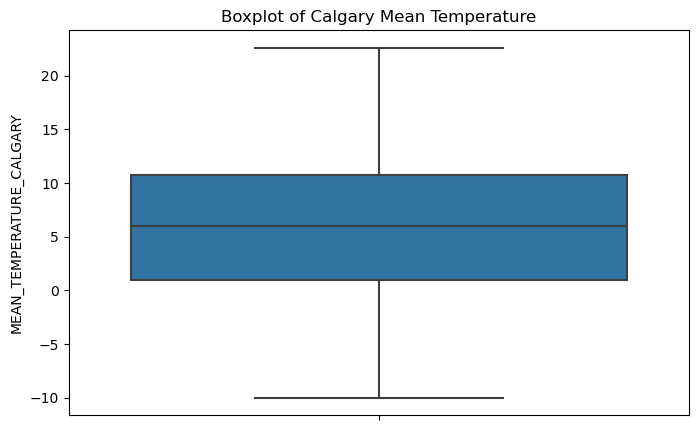

In [343]:
# Check outliers
mean_temp_columns = ['MEAN_TEMPERATURE_CALGARY']

# Correcting the data parameter to pass the DataFrame and using y parameter for the column
plt.figure(figsize=(8, 5))  # Setting the size of the figure
sns.boxplot(data=fall_df1, y='MEAN_TEMPERATURE_CALGARY')  # Corrected this line
plt.title('Boxplot of Calgary Mean Temperature')  # Adding a title to the plot
plt.show()  # Displaying the plot

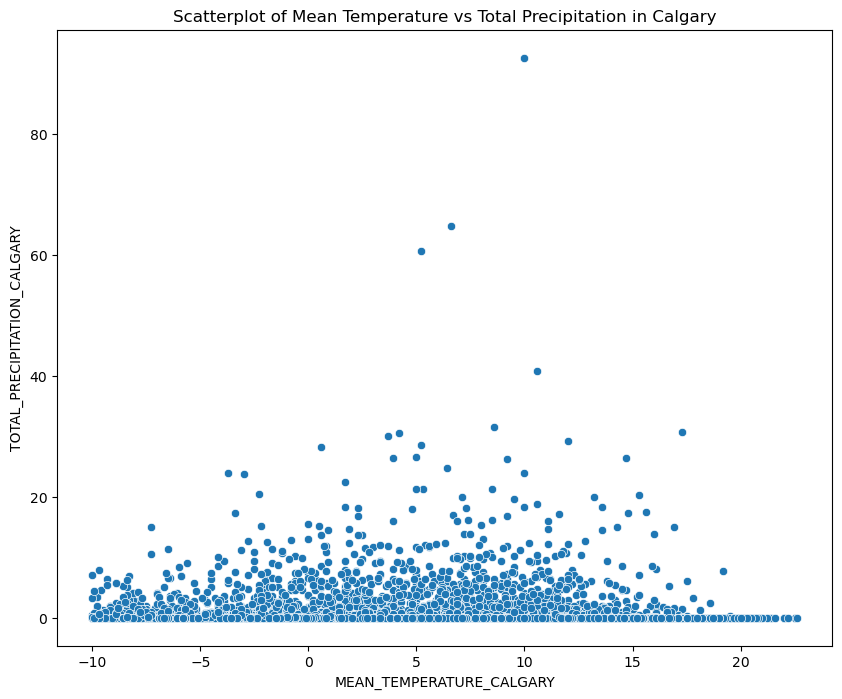

In [344]:
# Creating a scatter plot for Calgary to find outlier temperatures & precipitation
# Scatterplot temperatures & precipitation in Calgary
plt.figure(figsize=(10, 8))
sns.scatterplot(x=fall_df1['MEAN_TEMPERATURE_CALGARY'], y=fall_df1['TOTAL_PRECIPITATION_CALGARY'])
plt.title('Scatterplot of Mean Temperature vs Total Precipitation in Calgary')
plt.show()

In [345]:
# Create a list to keep outliers with temperatures < -10 
outliers = fall_df1[fall_df1['TOTAL_PRECIPITATION_CALGARY'] >50 ].index
outliers

Int64Index([4106, 4210, 5924], dtype='int64')

In [346]:
# Remove outliers
fall_df1.drop(outliers, inplace=True)

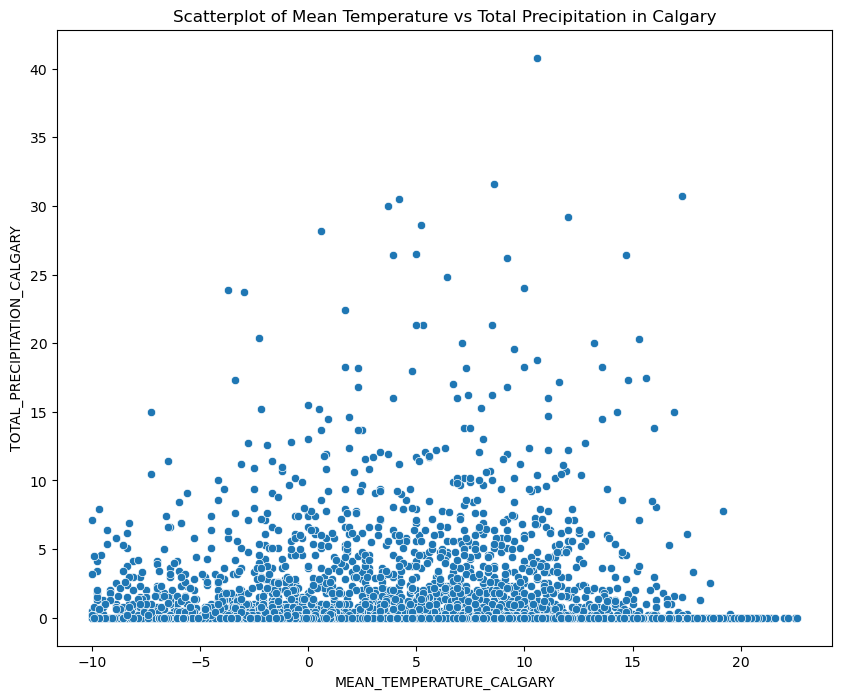

In [190]:
# Check outlier
# Scatterplot temperatures & precipitation in Calgary
plt.figure(figsize=(10, 8))
sns.scatterplot(x=fall_df1['MEAN_TEMPERATURE_CALGARY'], y=fall_df1['TOTAL_PRECIPITATION_CALGARY'])
plt.title('Scatterplot of Mean Temperature vs Total Precipitation in Calgary')
plt.show()

In [363]:
# Extract the year from the 'LOCAL_DATE' column
fall_df1['Year'] = fall_df1['LOCAL_DATE'].dt.year

# Group by 'Year' and calculate the mean for each group
yearly_mean_fall = fall_df1.groupby('Year').mean(numeric_only=True).reset_index()

# Print the new DataFrame
yearly_mean_fall

,Year,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY
0,1940,6.693902,1.429268
1,1941,5.212222,0.668889
2,1942,5.667470,1.091566
3,1943,7.150549,0.465934
4,1944,6.956180,0.440449
...,...,...,...
75,2015,6.098889,0.964045
76,2016,5.648352,0.617778
77,2017,6.548052,0.564634
78,2018,3.761798,1.270330


In [364]:
# Creating a linear regression model that aims to predict the mean temperature in Calgary based on the total precipitation
calgary_fall = yearly_mean_fall[['Year', 'TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY']].dropna()

x = calgary_fall['TOTAL_PRECIPITATION_CALGARY']
y = calgary_fall['MEAN_TEMPERATURE_CALGARY']

# Add a constant to the features matrix for the y-intercept
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.131
Model:                                  OLS   Adj. R-squared:                  0.120
Method:                       Least Squares   F-statistic:                     11.74
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):           0.000978
Time:                              10:24:03   Log-Likelihood:                -107.82
No. Observations:                        80   AIC:                             219.6
Df Residuals:                            78   BIC:                             224.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

The R-squared value of the model outputs above is low that it still represents a poor fit to the data. Do transformations to make the dataset more suitable for linear regression.

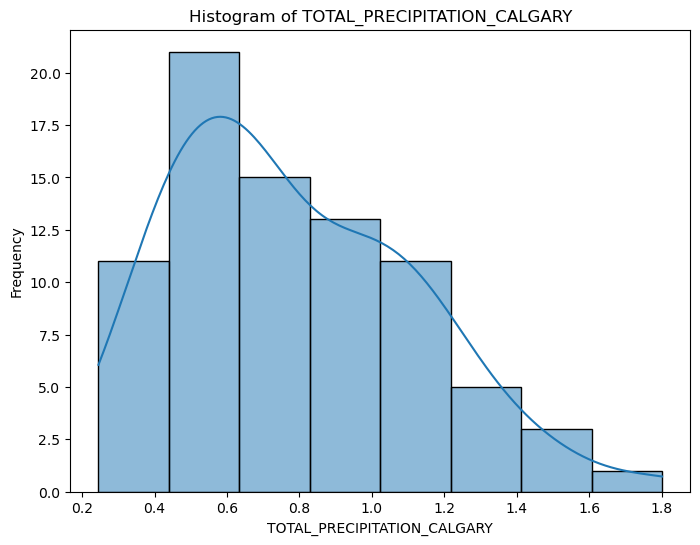

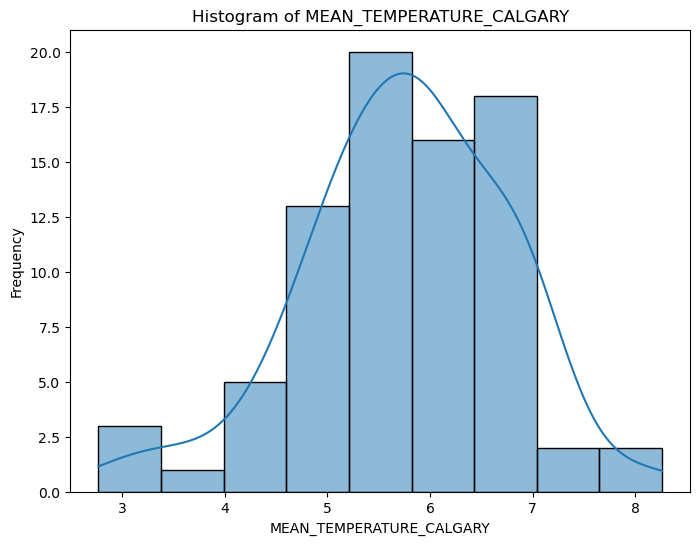

In [349]:
# Plots histograms to understanding the shape, center, and spread of data, as well as for identifying any potential outliers or skewness.
columns_to_plot = ['TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY']

# Plot histograms for each column
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(calgary_fall[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [360]:
# Apply Log Transformations
calgary_fall['LOG_TOTAL_PRECIPITATION_CALGARY'] = np.log(calgary_fall['TOTAL_PRECIPITATION_CALGARY']+1)
calgary_fall['LOG_MEAN_TEMPERATURE_CALGARY'] = np.exp(calgary_fall['MEAN_TEMPERATURE_CALGARY']+1)


x = calgary_fall['LOG_TOTAL_PRECIPITATION_CALGARY']
y = calgary_fall['MEAN_TEMPERATURE_CALGARY']


# Add a constant to the features matrix for the y-intercept
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.141
Model:                                  OLS   Adj. R-squared:                  0.130
Method:                       Least Squares   F-statistic:                     12.83
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):           0.000592
Time:                              10:23:43   Log-Likelihood:                -107.34
No. Observations:                        80   AIC:                             218.7
Df Residuals:                            78   BIC:                             223.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

Since No significant change in R-squared, we applied the Standard Scaling


In [361]:
# Apply StandardScaler 
# Initialize StandardScaler
scaler = StandardScaler()  # Ensure this line is not giving the error

# Apply scaling
calgary_fall['SCALED_LOG_TOTAL_PRECIPITATION'] = scaler.fit_transform(calgary_fall[['LOG_TOTAL_PRECIPITATION_CALGARY']])

# Prepare data for modeling
x = calgary_fall['SCALED_LOG_TOTAL_PRECIPITATION']
y = calgary_fall['MEAN_TEMPERATURE_CALGARY']
X = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, X).fit()

# Printing the model summary
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.141
Model:                                  OLS   Adj. R-squared:                  0.130
Method:                       Least Squares   F-statistic:                     12.83
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):           0.000592
Time:                              10:23:46   Log-Likelihood:                -107.34
No. Observations:                        80   AIC:                             218.7
Df Residuals:                            78   BIC:                             223.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

Since No significant change in R-squared, we applied the Min-Max scaling


In [377]:
# Apply Min-Max scaling
# Dropping NA values from specific columns
calgary_fall = yearly_mean_fall.dropna(subset=['TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY'])

# Apply Min-Max scaling to the precipitation data
scaler = MinMaxScaler()
calgary_fall['MINMAX_TOTAL_PRECIPITATION'] = scaler.fit_transform(calgary_fall[['TOTAL_PRECIPITATION_CALGARY']])

# Selecting features and target variable
x = calgary_fall['MINMAX_TOTAL_PRECIPITATION']
y = calgary_fall['MEAN_TEMPERATURE_CALGARY']

# Adding a constant term to the features for the intercept
X = sm.add_constant(x)

# Fitting the OLS model
model = sm.OLS(y, X).fit()

# Printing the model summary to see coefficients, R-squared, etc.
print(model.summary())

# Predicting the target variable based on the features
y_pred = model.predict(X)

# Calculating RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculating MAE (Mean Absolute Error)
mae = mean_absolute_error(y, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate the range of the mean temperature
temp_range = calgary_fall['MEAN_TEMPERATURE_CALGARY'].max() - calgary_fall['MEAN_TEMPERATURE_CALGARY'].min()
mean_temp_stats = calgary_fall['MEAN_TEMPERATURE_CALGARY'].describe()
print(mean_temp_stats)

                               OLS Regression Results                               
Dep. Variable:     MEAN_TEMPERATURE_CALGARY   R-squared:                       0.131
Model:                                  OLS   Adj. R-squared:                  0.120
Method:                       Least Squares   F-statistic:                     11.74
Date:                      Thu, 05 Oct 2023   Prob (F-statistic):           0.000978
Time:                              10:27:12   Log-Likelihood:                -107.82
No. Observations:                        80   AIC:                             219.6
Df Residuals:                            78   BIC:                             224.4
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

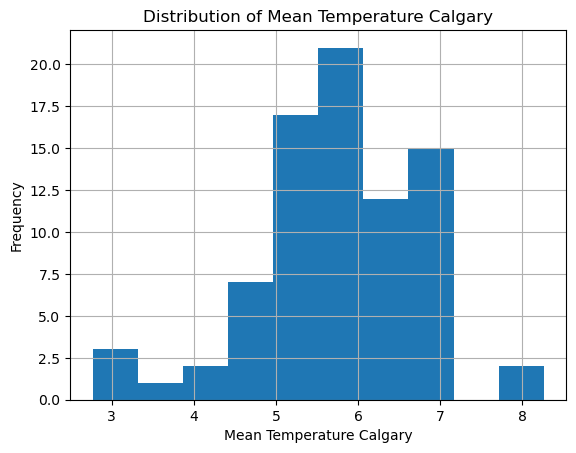

In [257]:
# Histogram
calgary_fall['MEAN_TEMPERATURE_CALGARY'].hist()
plt.xlabel('Mean Temperature Calgary')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Temperature Calgary')
plt.show()

The RMSE (Root Mean Square Error) and MAE (Mean Absolute Error) values are 0.9312701830692544 and 0.7222666821218573, respectively. Given that the distribution of the Mean Temperature is 1.005215, these error metrics are considered low and acceptable, indicating a reliable model performance."

In [258]:
# Predict Precipitation next fall season
data = calgary_fall[['Year', 'TOTAL_PRECIPITATION_CALGARY']]
from sklearn.linear_model import LinearRegression

X = data[['Year']]  # Features (year)
y = data['TOTAL_PRECIPITATION_CALGARY']  # Target variable (temperature)

model = LinearRegression()
model.fit(X, y)

future_years = pd.DataFrame({'Year': range(2020, 2021)})
future_temps = model.predict(future_years)

print("Predicted Precipitation for 2020:")
print(future_temps)

Predicted Precipitation for 2020:
[0.77695159]


RMSE: 0.911351459861262
MAE: 0.7675911387426637
R^2: -0.1052508667593961


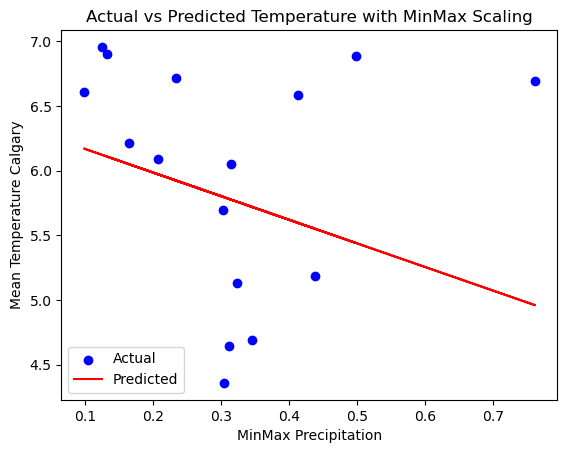

Predicted Future Mean Temperature Calgary: [4.93135029]


In [259]:
# Apply Min-Max scaling to the future prediction data 
calgary_fall = calgary_fall.dropna(subset=['TOTAL_PRECIPITATION_CALGARY', 'MEAN_TEMPERATURE_CALGARY'])

X = calgary_fall[['TOTAL_PRECIPITATION_CALGARY']]
y = calgary_fall['MEAN_TEMPERATURE_CALGARY']

# Apply MinMax Scaling to X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

# Plotting
plt.scatter(X_test, y_test, label='Actual', color='blue')
plt.plot(X_test, y_pred, label='Predicted', color='red')
plt.xlabel('MinMax Precipitation')
plt.ylabel('Mean Temperature Calgary')
plt.title('Actual vs Predicted Temperature with MinMax Scaling')
plt.legend()
plt.show()

# Sample future data (MinMax scaled)
future_precipitation = np.array([[0.77675776]]).reshape(-1, 1)  # Example scaled data

# Predict future temperatures
future_temperatures = model.predict(future_precipitation)

# Print the predictions
print("Predicted Future Mean Temperature Calgary:", future_temperatures)

Since R-squared is negative (R^2: -0.1052508667593961), it means the model is performing worse than a model that would predict the mean of the dependent variable for every observation. We need to consider more variables such as humidity, pressure, wind speed, and other climatic factors that could have significant influences on temperature. So, we're going to try using more detailed methods to understand the weather patterns better. Next, we try to do complex modeling techniques to better capture the underlying patterns in the weather data.

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=237.779, Time=1.18 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=230.856, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=231.722, Time=0.48 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=231.108, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=511.366, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=232.817, Time=0.23 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=232.823, Time=0.06 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=234.856, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=229.916, Time=0.09 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=231.752, Time=0.24 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=232.763, Time=0.49 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=230.374, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=231.137, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=229.225, Time=0.04 sec
 ARIMA(0,0,1)(1,0,0)[12] intercep

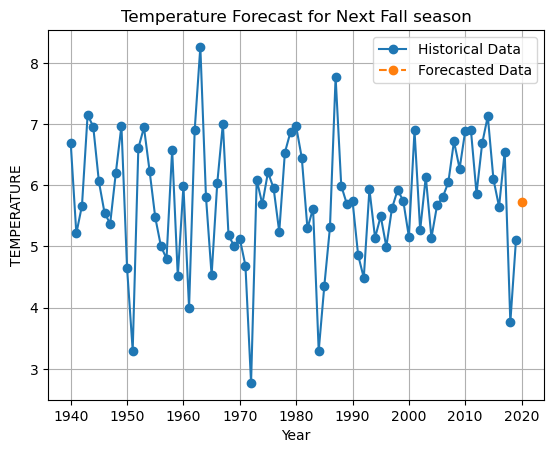

In [352]:
# Fit a seasonal ARIMA model instead (SARIMA)
model = pm.auto_arima(calgary_fall['MEAN_TEMPERATURE_CALGARY'], seasonal=True, m=12, trace=True,
                      suppress_warnings=True, stepwise=True)
model.fit(calgary_fall['MEAN_TEMPERATURE_CALGARY'])

# Forecast precipitation for next fall season
future_forecast = model.predict(n_periods=1)

# Print forecast
print("Forecasted Temperature for next fall season:")
print(future_forecast)

# Plot original data with markers
plt.plot(calgary_fall['Year'], calgary_fall['MEAN_TEMPERATURE_CALGARY'], label='Historical Data', marker='o')

# Plot forecasted data with markers and dashed lines
plt.plot(np.arange(2020,2021), future_forecast, label='Forecasted Data', linestyle='--', marker='o')

plt.xlabel('Year')
plt.ylabel('TEMPERATURE')
plt.title('Temperature Forecast for Next Fall season')
plt.legend()
plt.grid(True)
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=54.440, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=57.280, Time=0.25 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=57.185, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=203.403, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=55.283, Time=0.17 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=55.189, Time=0.16 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=56.382, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=56.364, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=56.151, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 2.391 seconds
Forecasted Precipitation for next fall season:
80    0.784802
dtype: float64


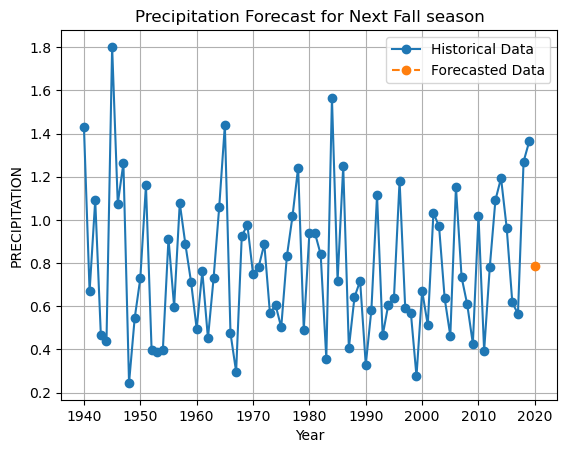

In [353]:
# Predict next fall season for PRECIPITATION 
# Fit a seasonal ARIMA model instead (SARIMA)
model = pm.auto_arima(calgary_fall['TOTAL_PRECIPITATION_CALGARY'], seasonal=True, m=12, trace=True,
                      suppress_warnings=True, stepwise=True)
model.fit(calgary_fall['TOTAL_PRECIPITATION_CALGARY'])

# Forecast precipitation for next fall season
future_forecast1 = model.predict(n_periods=1)

# Print forecast
print("Forecasted Precipitation for next fall season:")
print(future_forecast1)

# Plot original data with markers
plt.plot(calgary_fall['Year'], calgary_fall['TOTAL_PRECIPITATION_CALGARY'], label='Historical Data', marker='o')

# Plot forecasted data with markers and dashed lines
plt.plot(np.arange(2020,2021), future_forecast1, label='Forecasted Data', linestyle='--', marker='o')

plt.xlabel('Year')
plt.ylabel('PRECIPITATION')
plt.title('Precipitation Forecast for Next Fall season')
plt.legend()
plt.grid(True)
plt.show()

In [379]:
# Creating a new DataFrame for the predicted data
future_data = pd.DataFrame({'Year': [2020], 'MEAN_TEMPERATURE_CALGARY': future_forecast, 'TOTAL_PRECIPITATION_CALGARY' : future_forecast1})

# Concatenating the old and predicted data
fall = pd.concat([calgary_fall, future_data], ignore_index=True)
fall

,Year,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MINMAX_TOTAL_PRECIPITATION
0,1940,6.693902,1.429268,0.760935
1,1941,5.212222,0.668889,0.272341
2,1942,5.667470,1.091566,0.543939
3,1943,7.150549,0.465934,0.141929
4,1944,6.956180,0.440449,0.125554
...,...,...,...,...
76,2016,5.648352,0.617778,0.239499
77,2017,6.548052,0.564634,0.205351
78,2018,3.761798,1.270330,0.658806
79,2019,5.105882,1.363529,0.718693


In [380]:
# Drop column MINMAX_TOTAL_PRECIPITATION
fall = fall.drop(columns='MINMAX_TOTAL_PRECIPITATION')
# Rename columns
fall = fall.rename(columns={ 'MEAN_TEMPERATURE_CALGARY': 'Fall Mean Temperature', 'TOTAL_PRECIPITATION_CALGARY': 'Fall Precipitation'})
fall

,Year,Fall Mean Temperature,Fall Precipitation
0,1940,6.693902,1.429268
1,1941,5.212222,0.668889
2,1942,5.667470,1.091566
3,1943,7.150549,0.465934
4,1944,6.956180,0.440449
...,...,...,...
76,2016,5.648352,0.617778
77,2017,6.548052,0.564634
78,2018,3.761798,1.270330
79,2019,5.105882,1.363529


In [371]:
# Save the new DataFrame to a CSV file
# Specify the file path where the CSV file will be saved
file_path = r'C:\Users\CFS\Desktop\Data analysis\Midterm-Project\fall_temperature_forecast.csv'
fall.to_csv(file_path, index=False)

In [392]:
# Merging three DataFrames based on the 'Year' column
calgary = pd.merge(winter, spring, on='Year', suffixes=('_winter', '_spring'))
calgary = pd.merge(calgary, fall, on='Year', suffixes=('', '_fall'))
calgary

,Year,Winter Mean Temperature,Winter Precipitation,Spring Mean Temperature,Spring Precipitation,Fall Mean Temperature,Fall Precipitation
0,1940,-8.649451,0.410989,4.308046,1.549425,6.693902,1.429268
1,1941,-6.771111,0.330000,5.493182,1.195455,5.212222,0.668889
2,1942,-6.838889,0.711111,4.331868,0.918681,5.667470,1.091566
3,1943,-6.593333,0.497778,4.841463,1.131707,7.150549,0.465934
4,1944,-5.364835,0.376923,6.666667,1.376543,6.956180,0.440449
...,...,...,...,...,...,...,...
76,2016,-4.822222,0.407778,7.529348,0.835870,5.648352,0.617778
77,2017,-7.081395,0.802222,6.867073,1.292857,6.548052,0.564634
78,2018,-6.750575,0.661111,5.618987,1.067901,3.761798,1.270330
79,2019,-8.406667,0.591111,5.690476,0.808333,5.105882,1.363529


In [393]:
# Save the new DataFrame to a CSV file
# Specify the file path where the CSV file will be saved
file_path = r'C:\Users\CFS\Desktop\Data analysis\Midterm-Project\Calgary_temperature_forecast.csv'
calgary.to_csv(file_path, index=False)

In conclusion:

 - According to the outcomes derived from our current Seasonal ARIMA model:

        -The temperature in the upcoming winter is expected to increase, as evidenced by the rise from -8.4°C in 2019 to -7.4°C in 2020.
        -Spring temperatures are forecast to decrease slightly, moving from 5.7°C in 2019 to 5.5°C in 2020.
        -The fall temperatures are predicted to increase, from 5.1°C in 2019 to 5.7°C in 2020.
    
- To enhance the precision of our forecasts, integrating a varied array of meteorological and environmental data is essential. Incorporating elements such as wind speed, humidity, and, crucially, pollution indices can offer a more nuanced and comprehensive predictive model. Pollution indices, which encapsulate data on CO2 levels and other greenhouse gases, are instrumental in providing insights into intricate weather patterns and temperature variances.